## Team members: 
- **Amira Mohamed**
- **Doha Eid**
- **Mayar Ehab**

## Data Details:
- **ID**
- **Diagnosis Result**
- **Radius**
- **Texture**
- **Perimeter**
- **Area**
- **Smoothness**
- **Compactness**
- **Symmetry**
- **Fractal Dimension**

# Import libraries

In [40]:
# importing needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
from scipy import stats
from scipy.stats import mode
warnings.filterwarnings("ignore")

# Import prostate cancer csv file from its directory

In [41]:
data = pd.read_csv("Prostate_Cancer.csv")

# printing dataset
data

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [42]:
# We don't care about id column. So, we drop it (not a feature that affect the diagnosis_result)
data.drop(['id'],axis=1,inplace=True)
data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [44]:
# printing shape of the dataset after dropping the id column
data.shape

(100, 9)

In [45]:
# checking any missing values
data.isna().any()

diagnosis_result     False
radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
symmetry             False
fractal_dimension    False
dtype: bool

# check for any duplicated data

In [46]:
data.duplicated().sum()

0

no duplication is found in the dataset

In [47]:
# Statsical information for numerical features
round(data.describe(include="number"))

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,17.0,18.0,97.0,703.0,0.0,0.0,0.0,0.0
std,5.0,5.0,24.0,320.0,0.0,0.0,0.0,0.0
min,9.0,11.0,52.0,202.0,0.0,0.0,0.0,0.0
25%,12.0,14.0,82.0,477.0,0.0,0.0,0.0,0.0
50%,17.0,18.0,94.0,644.0,0.0,0.0,0.0,0.0
75%,21.0,22.0,114.0,917.0,0.0,0.0,0.0,0.0
max,25.0,27.0,172.0,1878.0,0.0,0.0,0.0,0.0


In [48]:
# Statsical information for categoral (non-numeric) features (Diagnosis result)
round(data.describe(exclude="number"))

,diagnosis_result
count,100
unique,2
top,M
freq,62


In [49]:
# checking the number for begnin and malignant tumors in dataset
data.diagnosis_result.value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

# checking the correlation between features of dataset using heatmap plot

<AxesSubplot:>

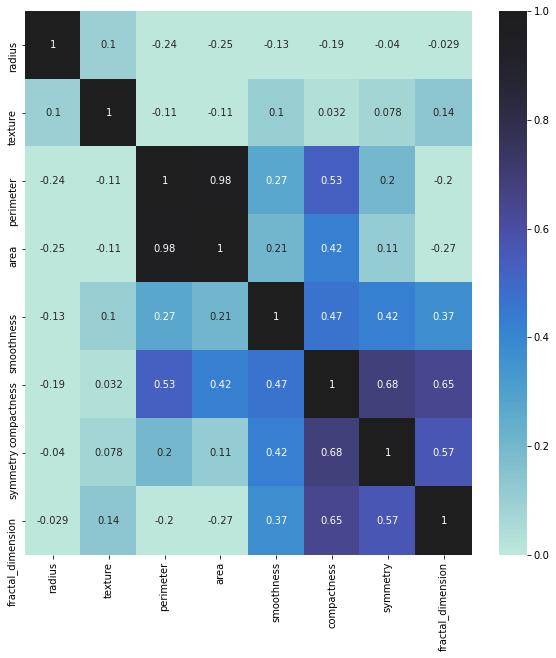

In [50]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True,vmin=0, vmax=1, center=True)

# Exploratory Data Analysis (EDA)
the number of patients diagnosed by malignant tumor is much more the begnin tumor

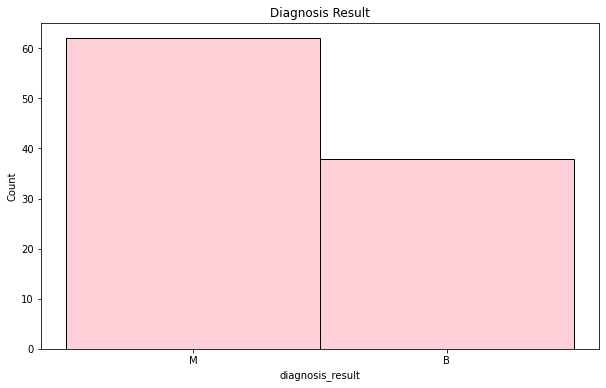

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="diagnosis_result",binwidth=5, color="pink")
plt.title("Diagnosis Result")
plt.show()

These lines of code are useful for distinguishing between categorical and numerical columns in a DataFrame, allowing for separate handling or analysis of different types of data.

In [52]:
# Extracting categorical and numerical columns
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
num_cols = [col for col in data.columns if data[col].dtype != 'object']

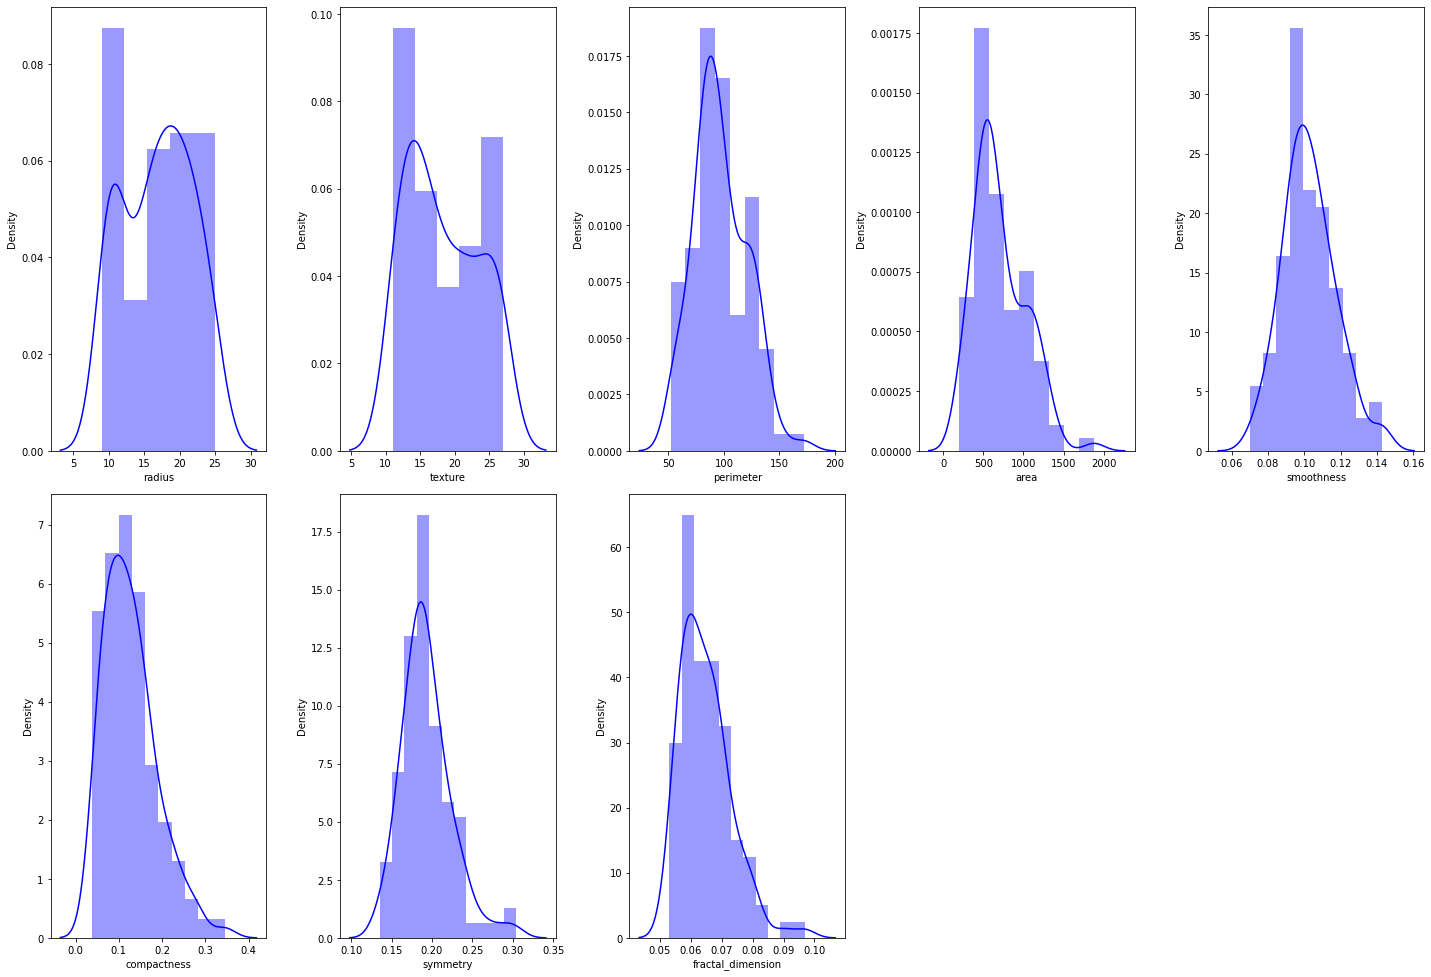

In [53]:
# checking numerical features distribution
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column],color='blue',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Convert string data to Numeric using binary encoding

In [54]:
data=data.replace({'diagnosis_result':{'M':1,'B':0}})
data

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,1,23,16,132,1264,0.091,0.131,0.210,0.056
96,0,22,14,78,451,0.105,0.071,0.190,0.066
97,0,19,27,62,295,0.102,0.053,0.135,0.069
98,0,21,24,74,413,0.090,0.075,0.162,0.066


# Check for Outliers and replacing them 
In summary, these lines of code identify and adjust potential outliers in the specified parameter columns by replacing them with the upper or lower bound values. so. the parameters_list contain all the features to check the presence of outliers in them.

In [55]:
Parameters_list = ["perimeter" , "area" , "smoothness" , "compactness", "symmetry" ]

for i in Parameters_list:
    Q3 = data[i].quantile(.75)
    Q1 = data[i].quantile(.25)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

# assigning the upper bound value to all values above it and the lower value to all values less than it 

    upper_values = data[i] >  upper_bound
    lower_values = data[i] <  lower_bound

    data.loc[upper_values, i] = upper_bound
    data.loc[lower_values, i] = lower_bound

we dropped the diagnosis results column to be the target element of the dataset and the remaining will be the features list

In [56]:
X=data.drop(['diagnosis_result'],axis=1)
Y=data['diagnosis_result']

standardize_features function takes a dataset X as input, calculates the mean and standard deviation for each feature, and then standardizes the features by subtracting the mean and dividing by the standard deviation (used for features on different scales).

In [57]:
# #Normalization: Normalization means all of the values of data, scale between 0 and 1.
def standardize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    standardized_X = (X - means) / stds
    return standardized_X

In [58]:
x_normalization=standardize_features(X)

In [59]:
x_normalization

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.336026,0.824398,2.583037,2.511239,1.746086,1.764464
1,-1.617011,-1.012208,1.561956,2.031184,2.583037,-0.804851,-0.401968,-0.948199
2,0.854853,1.697335,1.432944,1.632166,1.556019,0.588681,0.513596,-0.578290
3,-0.587068,-0.431591,-0.803259,-1.018222,-2.273539,2.511239,2.379938,3.983916
4,-1.617011,0.149025,1.647964,1.937107,2.583037,0.124171,-0.401968,-0.701593
...,...,...,...,...,...,...,...,...
95,1.266830,-0.431591,1.518952,1.830053,-0.811344,0.089762,0.619238,-1.071502
96,1.060841,-0.818669,-0.803259,-0.807359,0.163453,-0.942484,-0.085042,0.161527
97,0.442876,1.697335,-1.491322,-1.313430,-0.045432,-1.252157,-2.021811,0.531435
98,0.854853,1.116719,-0.975275,-0.930633,-0.880973,-0.873667,-1.071034,0.161527


In [60]:
x_normalization = x_normalization.to_numpy()
Y = Y.to_numpy()

# splitting dataset into 80% training and the rest is testing

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x_normalization, Y, test_size = 0.2, random_state=2)

In [62]:
# Calculate the confusion matrix 
# confusion_matrix_fun function calculates the confusion matrix by comparing the predicted and actual labels. It counts the occurrences of true positives, false positives, 
# false negatives, and true negatives, and returns the resulting 2x2 confusion matrix. This function is commonly used in evaluating the performance of classification models.
def confusion_matrix_fun(y_test, y_pred):
    confusion_matrix = np.zeros((2, 2))
    for i in range(len(y_test)):
        if y_pred[i] == 1 and y_test[i] == 1:
            confusion_matrix[1, 1] += 1
        elif y_pred[i] == 1 and y_test[i] == 0:
            confusion_matrix[1, 0] += 1
        elif y_pred[i] == 0 and y_test[i] == 1:
            confusion_matrix[0, 1] += 1
        elif y_pred[i] == 0 and y_test[i] == 0:
            confusion_matrix[0, 0] += 1
    return confusion_matrix

In [63]:
def evalute_model(X_test,y_test,y_pred):
    cm=confusion_matrix_fun(y_test,y_pred)
    Accuracy= (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])# Accuarcy of the model using Confusion matrix
    Senstivity=(cm[0,0])/(cm[0,0]+cm[1,0])# Sensitivy=TP/(TP+FN)
    precesion=(cm[0,0])/(cm[0,0]+cm[0,1]) # precesion=TP/(TP+FP)
    Specificity=(cm[1,1])/(cm[1,1]+cm[0,1]) # Specificity=TN/(TN+FP)
    return Accuracy,precesion,Senstivity,Specificity,cm

In [64]:
def plot_confusion(cf_matrix,title):
    fig,ax = plt.subplots()
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                            cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
                zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel("True")
    ax.set_title(title)

# KNN

### KNN Algorithm Using Sickit Learn

In [80]:
#KNN Classification!
# K=  number of nearest neighbors 
K=5
knn = KNeighborsClassifier(n_neighbors=K)  # 4 is optional.
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

### Evalute The Model

Accuracy using Confusion matrix=  0.85
Presion using Confusion matrix=  0.6
Senstivity using confusion matrix =  0.75
Specificity using confusion matrix =  0.9333333333333333
confusion matrix =  [[ 3.  1.]
 [ 2. 14.]]


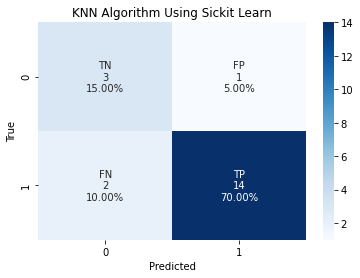

In [81]:
Acc,Sens,Pre,Spec,conf_matrix=evalute_model(X_test,y_test,y_pred_knn)
print("Accuracy using Confusion matrix= ",Acc)
print("Presion using Confusion matrix= ",Pre)
print("Senstivity using confusion matrix = ",Sens)
print("Specificity using confusion matrix = ",Spec)
print("confusion matrix = ",conf_matrix)
plot_confusion(conf_matrix,"KNN Algorithm Using Sickit Learn")


### KNN  Python form scratch implementation

In [67]:
# K-nearest neighbors (KNN) classification
# knn_predict function applies the KNN algorithm to classify the test data based on the nearest neighbors in the training data. 
# It calculates the distances, finds the nearest neighbors, performs majority voting, and returns the predicted labels.
def knn_predict(X_train, y_train, X_test, K):
    y_pred = []
    for i in range(len(X_test)):
        distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        nearest_neighbors = np.argsort(distances)[:K]
        labels = y_train[nearest_neighbors]
        y_pred.append(np.bincount(labels).argmax())
    return np.array(y_pred)

In [82]:
# Set the value of K
K = 5
# Predict the labels for the test set
y_pred_Scratch = knn_predict(X_train, y_train, X_test, K)

### Evalute Scratch Model 

Accuracy using Confusion matrix=  0.85
Senstivity using confusion matrix =  0.75
Presion using Confusion matrix=  0.6
Specificity using confusion matrix =  0.9333333333333333
confusion matrix =  [[ 3.  1.]
 [ 2. 14.]]


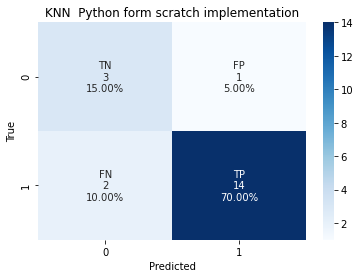

In [83]:
Acc_Scratch,Sens_Scratch,Pre_Scratch,Spec_Scratch,conf_matrix_Scratch=evalute_model(X_test,y_test,y_pred_Scratch)
print("Accuracy using Confusion matrix= ",Acc_Scratch)
print("Senstivity using confusion matrix = ",Sens_Scratch)
print("Presion using Confusion matrix= ",Pre_Scratch)
print("Specificity using confusion matrix = ",Spec_Scratch)
print("confusion matrix = ",conf_matrix_Scratch)
plot_confusion(conf_matrix_Scratch,"KNN  Python form scratch implementation")


# RNN

## Radius Nearest Neighbor algorithm Using Scikit learn 

In [70]:
# Comparison with scikit-learn's RadiusNeighborsClassifier
R=500
model = RadiusNeighborsClassifier(radius=R)
model.fit(X_train, y_train)
Y_pred_RNN_sk = model.predict(X_test)

### Evalute the model

Accuracy using Confusion matrix=  0.75
confusion matrix =  [[ 0.  0.]
 [ 5. 15.]]


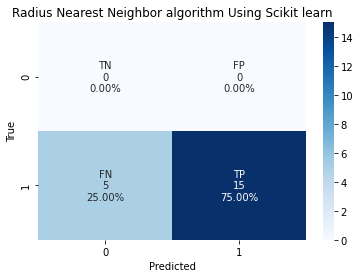

In [79]:
Acc_RNN_SK,Sens_RNN_SK,Pre_RNN_SK,Spec_RNN_SK,conf_matrix_RNN_SK=evalute_model(X_test,y_test,Y_pred_RNN_sk)
print("Accuracy using Confusion matrix= ",Acc_RNN_SK)
print("confusion matrix = ",conf_matrix_RNN_SK)
plot_confusion(conf_matrix_RNN_SK,"Radius Nearest Neighbor algorithm Using Scikit learn")


## Radius Nearest Neighbor algorithm scratch implementation

In [72]:
# Function to calculate the euclidean distance between the sample point and the training data
def euclideanDistance(x_train, sample):
    return np.sqrt( np.sum( np.square( sample - x_train ) ) )

In [73]:
# Function to search for the training points within the radius and return their target value
def findNeighbors(X_train, y_train, test, radius):
    neighbors = []
    no_instances, no_features = X_train.shape
    for i in range(no_instances):
        distance = euclideanDistance(X_train[i], test)
        if distance <= radius:
            neighbors.append(y_train[i])
    return np.array(neighbors)

In [74]:
# Function to return the prediction value by seeing the most often prediction value in the list
def predict(neighbors):
    prediction = mode( neighbors )[0][0]
    return prediction

In [75]:
# Function to make the whole RNN classifier and return the prediction
def radiusNearestNeighbors(X_train, y_train, X_test, radius):
    y_pred = []
    no_instances, no_features = X_test.shape
    for i in range(no_instances):
        neighbors = findNeighbors(X_train, y_train, X_test[i], radius)
        prediction = predict(neighbors)
        y_pred.append(prediction)
    return y_pred

In [76]:
# Fit the model and Predict
radius = 500
y_pred_Rnn = radiusNearestNeighbors(X_train, y_train, X_test, radius)

### Evalute the model

Accuracy using Confusion matrix=  0.75
confusion matrix =  [[ 0.  0.]
 [ 5. 15.]]


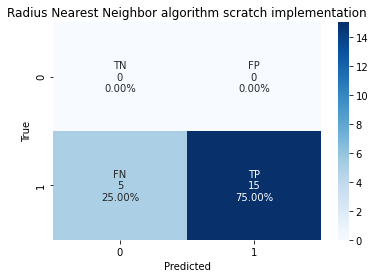

In [77]:
Acc_rnn,Sens_rnn,pre_rnn,Spec_rnn,conf_matrix_rnn=evalute_model(X_test,y_test,y_pred_Rnn)
print("Accuracy using Confusion matrix= ",Acc_rnn)
print("confusion matrix = ",conf_matrix_rnn)
plot_confusion(conf_matrix_rnn,"Radius Nearest Neighbor algorithm scratch implementation")
